##### Setup

In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

Populating the interactive namespace from numpy and matplotlib


##### Question 1: Create a unique name for each restaurant. 

In [3]:
#Combining 'DBA','BUILDING','STREET','ZIPCODE' and 'BORO' to create a new column called 'RESTUARANT'
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']

#Printing the first 10 values of the resturant column of the Dataframe 
df['RESTAURANT'].head(10)

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

##### Question 2: How many restaurants are included in the data?

In [4]:
#Taking the count of unique Restaurants in the dataframe
n = len(pd.unique(df['RESTAURANT']))
print("Number of restaurants are :",n)

Number of restaurants are : 10114


##### Question 3: How many chains are there? 

In [5]:
# Creating a new data frame with unique Restaurants 
dup_drop = df.drop_duplicates('RESTAURANT')
loc_count = dup_drop['DBA'].value_counts()
#Taking only the 'DBA' with atleast two different addresses
chain = loc_count[loc_count > 1]
print("Number of chains are:", len(chain))

Number of chains are: 368


##### Question 4: Plot a bar graph of the top 20 most popular chains. Count the number of restaurants for each chain as a measure of its popularity.

NOTE : Hale & Hearty Soups, Checkers and Pronto Pizza tie for the 20th place having 10 restaurants each in their chains.  

<AxesSubplot:>

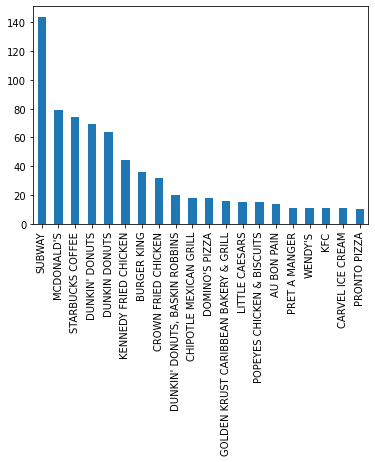

In [6]:
# Plotting a bar graph for the 20 most popular chains
popular_chains = chain[:20]
popular_chains.plot(kind = 'bar')

##### Question 5: What fraction of all restaurants are chain restaurants? 

In [7]:
#Numerator = Sum of all chain restaurants 
num = chain.sum()

#Denominator = Total number of restaurants
den = len(pd.unique(df['RESTAURANT']))
fraction = num/den
print("The fraction of all restaurants that are chain restaurants is: ",fraction)

The fraction of all restaurants that are chain restaurants is:  0.16472216729286138


##### Question 6:  Plot the number of non-chain restaurants in each boro.


<AxesSubplot:>

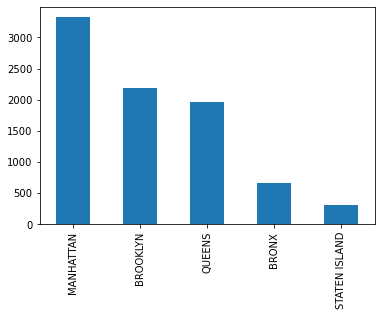

In [8]:
#Getting a list of all Restuarants that are not chains
not_a_chain = loc_count[loc_count < 2]
not_a_chain.index.values

#Replace missing values with standard missing value
rep_missing = dup_drop['BORO'].replace("Missing",np.nan)
rep_missing = dup_drop[dup_drop['BORO'] == rep_missing]

#Get all the 'BORO' and count of restaurants that are not chains in that 'BORO'
not_a_chain_boros = rep_missing[rep_missing['DBA'].isin(not_a_chain.index.values)]
count = not_a_chain_boros['BORO'].value_counts()

count.plot(kind = 'bar')

##### Question 7:  Plot the fraction of non-chain restaurants in each boro. Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

The Borough with the highest ratio of independent restaurants is Brooklyn, whereas the Borough with the highest number of non-chain restaurants is Manhattan.


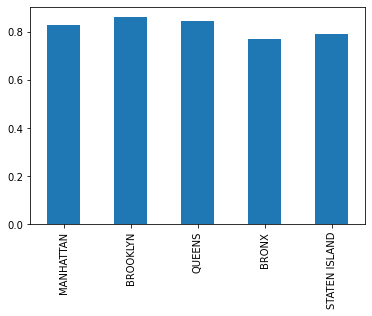

In [9]:
# Numerator = Number of non-chains per Boro 
not_chain_num = not_a_chain_boros['BORO'].value_counts()

#Denominator = Total number of unique restaurants in each Boro
not_chain_den = rep_missing['BORO'].value_counts()

#Plotting fraction of non-chain restaurants in each Boro
(not_chain_num/not_chain_den).plot(kind = 'bar')

print("The Borough with the highest ratio of independent restaurants is Brooklyn, whereas the Borough with the highest number of non-chain restaurants is Manhattan.")


##### Question 8: Plot the popularity of cuisines. Which cuisines are the most well-represented among all restaurants? Plot the popularity of the top 20 cuisines.

The cuisine that is most well-represented among all restaurants is American


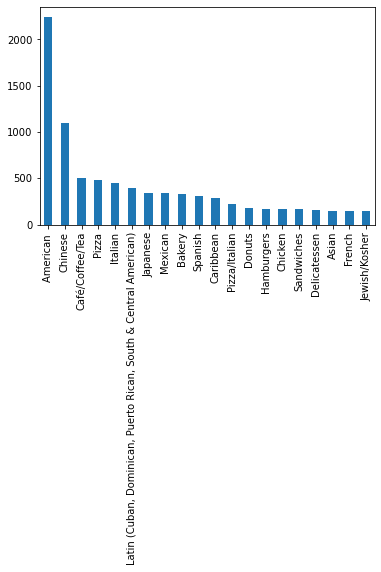

In [10]:
#Creating a dataframe with 'RESTAURANT' and 'CUISINE'
popular_cuisine = df[['RESTAURANT', 'CUISINE DESCRIPTION']]

#Removing duplicates
diff_cuisines = popular_cuisine.drop_duplicates('RESTAURANT')

#Taking the count all cuisines among different restaurants
popular_cuisines = diff_cuisines['CUISINE DESCRIPTION'].value_counts()[:20]

#Plotting the 20 most popular cuisines
popular_cuisines.plot(kind = 'bar')
print("The cuisine that is most well-represented among all restaurants is American")

##### Question 9: Plot the cuisines among restaurants which never got cited for violations. Plot the popularity of the top-20 among these cuisines.

NOTE : Hamburgers, Korean, Pizza/Italian, Sandwiches, Sandwiches/Salads/Mixed Buffet and Mexican are all served in 3 restaurants which never got cited for violations and draw for the 20th position. 

<AxesSubplot:>

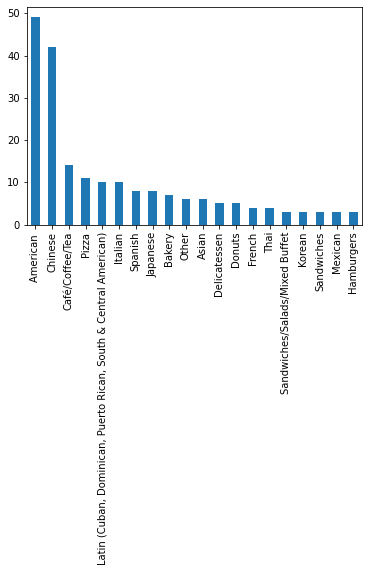

In [11]:
#Finding unique restaurants where violation code is not null
mask = df[df['VIOLATION CODE'].notnull()]['RESTAURANT'].unique()

#Finding the restaurants without violation codes
count_no_violations = df[~df['RESTAURANT'].isin(mask)]

#Getting the count of cuisines from restaurants which never got cited for violations 
count_no_violations = count_no_violations.drop_duplicates(subset = ['RESTAURANT'])
plot_variables = count_no_violations['CUISINE DESCRIPTION'].value_counts()
plot_variables.to_csv('plot.csv')

#Plotting the cuisines among restaurants which never got cited for violations
plot_variables[:20].plot(kind = 'bar')

##### Question 10: What cuisines tend to be the “cleanest”? Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are “most likely to be clean.”

In [12]:
#Creating a dataframe with 'CUISINE DESCRIPTION' and count of cuisine descriptions
cuisine_count = dup_drop['CUISINE DESCRIPTION'].value_counts().to_frame(name = 'counts')

#Selecting cuisines with atleast 20 restaurants representing it 
cuisine_with_20 = cuisine_count[cuisine_count['counts'] >= 20]

#Selecting cuisines with no violations
count_no_violations = count_no_violations.drop_duplicates()
cuisine_no_violations = count_no_violations['CUISINE DESCRIPTION'].value_counts().to_frame(name = 'counts')

count = cuisine_with_20.merge(cuisine_no_violations, left_index= True, right_index = True)
count['Ratio of Cleanliness'] = count['counts_y']/count['counts_x']
clean_cuisines = count.sort_values(by = 'Ratio of Cleanliness', ascending = False)

#Plotting the top 10 cuisines with the highest ratio of restaurants that are "most likely to be clean"
clean_cuisines[['Ratio of Cleanliness']][:10]

,Ratio of Cleanliness
Soul Food,0.090909
Vietnamese/Cambodian/Malaysia,0.062500
Other,0.058252
Soups & Sandwiches,0.047619
Continental,0.047619
Barbecue,0.047619
Asian,0.041096
Chinese,0.038251
Greek,0.036364
Peruvian,0.035714


##### Question 11: What are the most common violations in each borough? Create a table of the number of times each violation description was observed in each borough, and figure out the most common violation description for each borough.

NOTE : The question did not mention whether to include missing values or not. We have included missing values in our output, however, to exclude missing values the below code will have to be used 

pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'].replace('Missing',np.nan)).idxmax()

instead of 

pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO']).idxmax()

In [13]:
# Creating crosstab using violation description and borough and find the maximum number of desripctions using idxmax()
# Missing values are included here since the question did not state to remove it 
pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO']).idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
Missing          Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

In [14]:
# Creating table with all occurrances of violation descriptions in each Borough
pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'].replace("Missing",np.nan))

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16
...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,2,3,11,3,1
Toilet facility used by women does not have at least one covered garbage receptacle.,1,5,7,2,1
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",2,8,15,20,3


##### Question 12: What are the most common violations per borough, after normalizing for the relative abundance of each violation? For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by violationFrequency. We want to do this for each borough. Find the biggest violations: Now, after this normalization, for each borough, figure out the most common violation description.

NOTE : The question did not mention whether to include missing values or not. We have included missing values in our output, however, to exclude missing values the below code will have to be used 

frequent = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'].replace('Missing',np.nan))

instead of 

frequent = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'])

In [15]:
#Missing values are included here since the question did not state to remove it 
frequent = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'])

# Normalize the frequencies of each violation in the Boroughs to find more relevant violations
frequent.div(frequent.sum(axis = 1), axis = 0).idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
Missing          ''''Wash hands sign not posted at hand wash f...
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

##### Question 13: How many phone area codes correspond to a single zipcode? 

In [16]:
df_zipcode = df[['PHONE', 'ZIPCODE']]
df_zipcode = df_zipcode.drop_duplicates(['PHONE', 'ZIPCODE'])

#creating an 'Area Code' column by isolating the first 3 digits of the phone column 
df_zipcode['AREA CODE'] = df_zipcode['PHONE'].str[:3]

# Summing up the number of area codes that appear only in one zipcode when checked in the zipcode dataframe
total_area_codes = sum(df_zipcode['AREA CODE'].value_counts() == 1)
print('The total number of area codes in a single zip code is', total_area_codes)

The total number of area codes in a single zip code is 34


##### Question 14: Find common misspellings of street names

In [17]:
names = df['STREET'] # Create new dataframe only with street names
last_word_list = [] # Create new list for the last word of a street name (ex. St, Ave, Rd)
other_words_list = [] # Create new list for all other words in a street name except the final word

# Create for loop to run though name dataframe, split each street to create sublist to allow indexing of final word, append final word to last_word_list and all other words to other_words_list
for x in names:
    y = x.split()
    last_word_list.append(y[-1])
    other_words_list.append(y[0:-1])

# Create new_other_words_list to remove the list formatting created in split and append strings of all other words to this list
new_other_words_list = []
for i in other_words_list:
    new_other_words_list.append(' '.join(i))

# Create columns 1 and 2 for the last word and other words
column1 = Series(last_word_list)
column2 = Series(new_other_words_list)

# Assign these columns names for the dataframe
df['STREET TYPE'] = column1
df['STREET BASE'] = column2

# Create new column called Street Base & Zip to combine the Street Base column (Other words) and Zipcode
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']

# Create new dataframe using only the Street Base & Zip, Street Type, and Street Base Columns
new_df = df[['STREET BASE & ZIP', 'STREET TYPE', 'STREET BASE']]
new_df = new_df.drop_duplicates()

# Include only those which have Street Base entries that are not blank
new_df = new_df[new_df['STREET BASE'].notna()]

# Create a mask to find rows who have final words that do not match, and create a new merged dataframe for these rows
merged = new_df.merge(new_df, on = 'STREET BASE & ZIP')

# Match these with the commonly misspelled names included in the assignment and create an output table
mask = merged['STREET TYPE_x'] != merged['STREET TYPE_y']
new_merged = merged[mask]
pd.crosstab(new_merged['STREET TYPE_x'], new_merged['STREET TYPE_y']).idxmax()[['AVE', 'ST','RD','PL','BOULEARD', 'BULEVARD']]



STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object